In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

from anonymeter.evaluators import SinglingOutEvaluator
from anonymeter.evaluators import LinkabilityEvaluator
from anonymeter.evaluators import InferenceEvaluator

In [32]:
train = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/outliers/train.csv")
control = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/outliers/control.csv")

soutliers = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/outliers/soutliers.csv")
soutliers09 = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/outliers/soutliers09.csv")
synoutliers = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/outliers/synoutliers.csv")

In [9]:
base_path = "C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/outliers"

for i in range(100, 59, -1):  
    suffix = f"{i:03d}"  
    filename = f"soutliers{suffix}.csv"
    full_path = f"{base_path}/{filename}"
    
    try:
        globals()[f"soutliers{suffix}"] = pd.read_csv(full_path)
        print(f"Imported: soutliers{suffix}")
    except FileNotFoundError:
        print(f"File not found: {filename}")


Imported: soutliers100
Imported: soutliers099
Imported: soutliers098
Imported: soutliers097
Imported: soutliers096
Imported: soutliers095
Imported: soutliers094
Imported: soutliers093
Imported: soutliers092
Imported: soutliers091
Imported: soutliers090
Imported: soutliers089
Imported: soutliers088
Imported: soutliers087
Imported: soutliers086
Imported: soutliers085
Imported: soutliers084
Imported: soutliers083
Imported: soutliers082
Imported: soutliers081
Imported: soutliers080
Imported: soutliers079
Imported: soutliers078
Imported: soutliers077
Imported: soutliers076
Imported: soutliers075
Imported: soutliers074
Imported: soutliers073
Imported: soutliers072
Imported: soutliers071
Imported: soutliers070
Imported: soutliers069
Imported: soutliers068
Imported: soutliers067
Imported: soutliers066
Imported: soutliers065
Imported: soutliers064
Imported: soutliers063
Imported: soutliers062
Imported: soutliers061
Imported: soutliers060


## Singling Out Risk

## Synthesizer

In [47]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=2100)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.0, ci=(0.0, 0.0))
['income >= 14620052.3511151']
Successs rate of main attack: SuccessRate(value=0.0013882839878934005, error=0.0013042197298015722)
Successs rate of baseline attack: SuccessRate(value=0.0009129630002746145, error=0.0009129630002746143)
Successs rate of control attack: SuccessRate(value=0.017776072311767616, error=0.005577106142222255)


## Synthpop

In [49]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=2200)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.860097163306352, ci=(0.8442517935349614, 0.8759425330777426))
['zip_code == 71351', 'income == 3030900.0', 'zip_code == 16051']
Successs rate of main attack: SuccessRate(value=0.8784301255709587, error=0.013627476579709606)
Successs rate of baseline attack: SuccessRate(value=0.029457985351218068, error=0.007011488527681123)
Successs rate of control attack: SuccessRate(value=0.1310406757852329, error=0.014073656132618819)


# Singling Out Multivariate Risk

## Synthesizer

In [50]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.4425663042433663, ci=(0.39149295976807374, 0.49363964871865884))
["gender== 'Female' & age<= 18 & income>= 10649153.9235748", "income>= 14132221.0192374 & job== 'Unemployed' & education_level== 'Master\\'s'", "zip_code<= 10002.1965103727 & education_level== 'High School' & marital_status== 'Married'"]
Successs rate of main attack: SuccessRate(value=0.4980152486809231, error=0.043658388089214704)
Successs rate of baseline attack: SuccessRate(value=0.019690180783391284, error=0.011560927750002972)
Successs rate of control attack: SuccessRate(value=0.09947182034321253, error=0.025953222936491566)


In [66]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.3937677044982886, ci=(0.3507818532342642, 0.43675355576231295))
["gender== 'Female' & income>= 14132221.0192374 & job== 'Unemployed'", "education_level== 'Some College' & zip_code>= 99980.3330265 & job== 'Unemployed'", "income>= 14428660.9403295 & education_level== 'High School' & gender== 'Male'"]
Successs rate of main attack: SuccessRate(value=0.473875445500399, error=0.0345172687738631)
Successs rate of baseline attack: SuccessRate(value=0.004877490912323826, error=0.004191632805493222)
Successs rate of control attack: SuccessRate(value=0.13214033893693194, error=0.02334379543748832)


## Synthesizer rankcor = 0.9

In [51]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=soutliers09, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.36837981463777747, ci=(0.30578009770105063, 0.4309795315745043))
["zip_code>= 77806.5348819089 & education_level== 'Master\\'s' & income>= 13433168.131889", "job== 'Unemployed' & zip_code<= 10121.0 & income<= 700.0", "education_level== 'Master\\'s' & age<= 46 & zip_code>= 99995.827759393"]
Successs rate of main attack: SuccessRate(value=0.5039695026381538, error=0.04365734824780079)
Successs rate of baseline attack: SuccessRate(value=0.009766424188006807, error=0.00772382791604657)
Successs rate of control attack: SuccessRate(value=0.2146696561361764, error=0.035785368921858796)


In [67]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=soutliers09, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.3869896201461653, ci=(0.3419082406498859, 0.43207099964244466))
["job== 'Service' & zip_code<= 12002.0047761938 & income>= 13522055.61491", "marital_status== 'Divorced' & job== 'Professional' & zip_code>= 99967.590558893", "ethnicity== 'White' & education_level== 'Some College' & income>= 14542159.7381912"]
Successs rate of main attack: SuccessRate(value=0.48507168314308513, error=0.03454922492250345)
Successs rate of baseline attack: SuccessRate(value=0.004877490912323826, error=0.004191632805493222)
Successs rate of control attack: SuccessRate(value=0.16000065613947087, error=0.025290915251913758)


## Synthpop

In [52]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.21603566764921353, ci=(0.1665211898495759, 0.26555014544885114))
["income>= 874700.0 & zip_code<= 10097 & marital_status== 'Single'", "education_level== 'Some College' & ethnicity== 'Black' & zip_code<= 10099", "job== 'Unemployed' & ethnicity== 'Asian' & zip_code>= 99935"]
Successs rate of main attack: SuccessRate(value=0.29358586281600285, error=0.03973336898037523)
Successs rate of baseline attack: SuccessRate(value=0.03159868869785266, error=0.014847713977096213)
Successs rate of control attack: SuccessRate(value=0.09892056560053973, error=0.025887734090149266)


In [68]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.1941803555892299, ci=(0.15455352763986296, 0.23380718353859686))
["gender== 'Male' & income>= 14426500.0 & ethnicity== 'Hispanic'", "income>= 13517100.0 & zip_code<= 10121 & education_level== 'Master\\'s'", "income>= 13986500.0 & ethnicity== 'Asian' & education_level== 'PhD'"]
Successs rate of main attack: SuccessRate(value=0.2798073263605058, error=0.03101456969215784)
Successs rate of baseline attack: SuccessRate(value=0.027269966197696116, error=0.0110289552565978)
Successs rate of control attack: SuccessRate(value=0.10626071400119304, error=0.021220022324138638)


# Linkability

In [33]:
aux_cols = [["age","zip_code","gender","education_level"],
            ["ethnicity","marital_status","job","income"]]

## synthesizer rankcor = 1

### n_neighbors=1

In [38]:
levaluator11 = LinkabilityEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=8000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator11.evaluate(n_jobs=-2) 
print(levaluator11.risk())
res = levaluator11.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.27930794062798653, ci=(0.2694736301502477, 0.28914225110572533))
Successs rate of main attack: SuccessRate(value=0.2794808893853253, error=0.00983042923602659)
Successs rate of baseline attack: SuccessRate(value=0.0003649159500939703, error=0.000342850039931801)
Successs rate of control attack: SuccessRate(value=0.00023997594407999028, error=0.00023997594407999028)


### n_neighbors=10

In [ ]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.9990166021156566, ci=(0.99817091276124, 0.9998622914700731))
Successs rate of main attack: SuccessRate(value=0.9990207580767941, error=0.000842113178252425)
Successs rate of baseline attack: SuccessRate(value=0.004725644010869512, error=0.002070396402114127)
Successs rate of control attack: SuccessRate(value=0.004226123732514363, error=0.001952207461767974)


### n_neighbors= 20

In [39]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.9995143443973317, ci=(0.9990286859673728, 1.0))
Successs rate of main attack: SuccessRate(value=0.9995202783551492, error=0.00047972164485074323)
Successs rate of baseline attack: SuccessRate(value=0.0127179684645519, error=0.0034392147830569473)
Successs rate of control attack: SuccessRate(value=0.01221844818619675, error=0.003370525065617979)


### n_neighbors = 50

In [ ]:
levaluator13 = LinkabilityEvaluator(ori=train, 
                                 syn=soutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator13.evaluate(n_jobs=-2) 
print(levaluator13.risk())
res = levaluator13.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

## synthpop

### n_neighbors = 1

In [42]:
levaluator21 = LinkabilityEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator21.evaluate(n_jobs=-2) 
print(levaluator21.risk())
res = levaluator21.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.00224892010825164, ci=(0.0006322684994291912, 0.003865571717074089))
Successs rate of main attack: SuccessRate(value=0.002727562897448915, error=0.001543358850427869)
Successs rate of baseline attack: SuccessRate(value=0.0009792419232058924, error=0.000842113178252425)
Successs rate of control attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)


### n_neighbors = 10

In [41]:
levaluator2 = LinkabilityEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator2.evaluate(n_jobs=-2) 
print(levaluator2.risk())
res = levaluator2.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.018319059513839286, ci=(0.01325104687162746, 0.02338707215605111))
Successs rate of main attack: SuccessRate(value=0.02295813417083246, error=0.00461645348415387)
Successs rate of baseline attack: SuccessRate(value=0.0022280426190937654, error=0.0013800768846600243)
Successs rate of control attack: SuccessRate(value=0.004725644010869512, error=0.002070396402114127)


## n_neighbors = 20

In [43]:
levaluator22 = LinkabilityEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator22.evaluate(n_jobs=-2) 
print(levaluator22.risk())
res = levaluator22.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.03058706386617503, ci=(0.023499822460059796, 0.037674305272290265))
Successs rate of main attack: SuccessRate(value=0.0421896648875057, error=0.006211094343124017)
Successs rate of baseline attack: SuccessRate(value=0.01321748874290705, error=0.003506490862480133)
Successs rate of control attack: SuccessRate(value=0.011968688047019177, error=0.0033356228716572146)


### n_neighbors = 50

In [44]:
levaluator23 = LinkabilityEvaluator(ori=train, 
                                 syn=synoutliers, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=50)

levaluator23.evaluate(n_jobs=-2) 
print(levaluator23.risk())
res = levaluator23.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.06502019188311388, ci=(0.05125468627933239, 0.07878569748689536))
Successs rate of main attack: SuccessRate(value=0.13085451429554468, error=0.010439993803032203)
Successs rate of baseline attack: SuccessRate(value=0.07266040186716981, error=0.008029934833861448)
Successs rate of control attack: SuccessRate(value=0.07041256061457164, error=0.007913909553454758)


## synthesizer rankcor = [0.70,0.99]

In [14]:
linkability_results = []
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]

for suffix in suffixes:  
    syn_varname = f"soutliers{suffix}"
    
    if syn_varname in globals():
        syn_data = globals()[syn_varname]
        
        print(f"Evaluating dataset: {syn_varname}")
        
        levaluator = LinkabilityEvaluator(
            ori=train,
            syn=syn_data,
            control=control,
            n_attacks=4000,
            aux_cols=aux_cols,
            n_neighbors=10
        )
        
        levaluator.evaluate(n_jobs=-2)
        
        res = levaluator.results()

        privacy_risk = levaluator.risk()
        print(f"Privacy risk for {syn_varname}: {privacy_risk}")
        
        linkability_results.append({
            "rankcor": int(suffix) / 100,  
            "attack_rate": res.attack_rate.value,  
            "baseline_rate": res.baseline_rate.value, 
            "control_rate": res.control_rate.value,   
            "risk": privacy_risk  
        })

df_link = pd.DataFrame(linkability_results)

df_link = df_link.sort_values(by="rankcor", ascending=False)

Evaluating dataset: soutliers100
Privacy risk for soutliers100: PrivacyRisk(value=0.998265446889876, ci=(0.997066792886189, 0.9994641008935629))
Evaluating dataset: soutliers099
Privacy risk for soutliers099: PrivacyRisk(value=0.9085622706757537, ci=(0.8996257946793809, 0.9174987466721265))
Evaluating dataset: soutliers098
Privacy risk for soutliers098: PrivacyRisk(value=0.8457468176431084, ci=(0.8345432964430783, 0.8569503388431385))
Evaluating dataset: soutliers097
Privacy risk for soutliers097: PrivacyRisk(value=0.7863747082213663, ci=(0.77364354853713, 0.7991058679056027))
Evaluating dataset: soutliers096
Privacy risk for soutliers096: PrivacyRisk(value=0.6937481187524922, ci=(0.6794258500188363, 0.7080703874861481))
Evaluating dataset: soutliers095
Privacy risk for soutliers095: PrivacyRisk(value=0.668600450989978, ci=(0.6539785520205799, 0.6832223499593761))
Evaluating dataset: soutliers094
Privacy risk for soutliers094: PrivacyRisk(value=0.6284551372081364, ci=(0.613448584024228

In [15]:
df_link['risk_value'] = df_link['risk'].apply(lambda x: x.value)
df_link['risk_ci_lower'] = df_link['risk'].apply(lambda x: x.ci[0])
df_link['risk_ci_upper'] = df_link['risk'].apply(lambda x: x.ci[1])

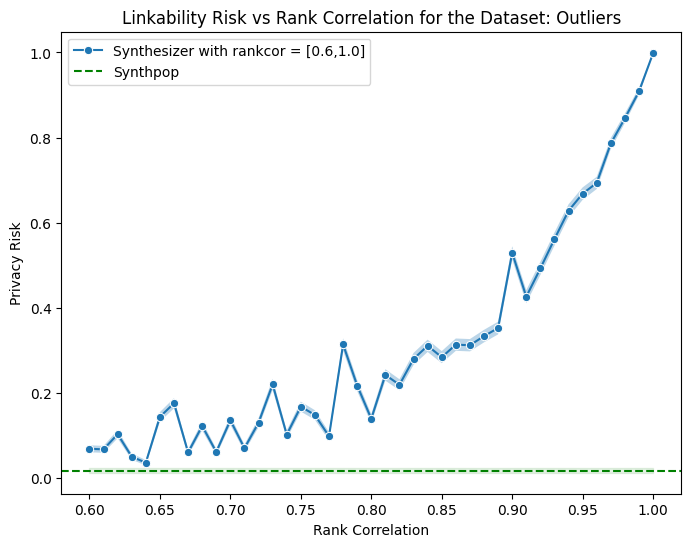

In [45]:
risk1 = levaluator2.risk()

row1 = {
    'rankcor': 1.00,  
    'risk_value': risk1.value,
    'risk_ci_lower': risk1.ci[0],
    'risk_ci_upper': risk1.ci[1]
}


plt.figure(figsize=(8, 6))
sns.lineplot(
    x='rankcor',
    y='risk_value',
    data=df_link,
    marker='o',
    label='Synthesizer with rankcor = [0.6,1.0]'
)

plt.fill_between(
    df_link['rankcor'],
    df_link['risk_ci_lower'],
    df_link['risk_ci_upper'],
    alpha=0.3
)

plt.axhline(y=risk1.value, color='green', linestyle='--', label='Synthpop')
plt.fill_between(
    df_link['rankcor'],
    risk1.ci[0],
    risk1.ci[1],
    color='green',
    alpha=0.1
)

plt.xlabel('Rank Correlation')
plt.ylabel('Privacy Risk')
plt.title('Linkability Risk vs Rank Correlation for the Dataset: Outliers')
plt.legend()
plt.show()



# Inference

## synthesizer rankcor = 1

In [18]:
columns = train.columns
results1 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator1 = InferenceEvaluator(ori=train, 
                                   syn=soutliers, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=2000)
    ievaluator1.evaluate(n_jobs=-2)
    results1.append((secret, ievaluator1.results()))

print(ievaluator1.risk())

PrivacyRisk(value=0.9949407799807746, ci=(0.9919540249035228, 0.9979275350580263))


## synthpop

In [19]:
columns = train.columns
results3 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator3 = InferenceEvaluator(ori=train, 
                                   syn=synoutliers, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=1000)
    ievaluator3.evaluate(n_jobs=-2)
    results3.append((secret, ievaluator3.results()))

print(ievaluator3.risk())

PrivacyRisk(value=0.034732127922635685, ci=(0.017215346662681544, 0.05224890918258983))


## synthesizer rankcor = [0.60,0.99]

In [ ]:
columns = train.columns

for i in range(100, 59, -1):  
    suffix = f"{i:03d}"  
    
    syn_data_varname = f"soutliers{suffix}"
    results_varname = f"results{suffix}"
    
    if syn_data_varname in globals():
        syn_data = globals()[syn_data_varname]
        results_list = []

        print(f"\nRunning inference attacks on: {syn_data_varname}")
        
        for secret in columns:
            aux_cols = [col for col in columns if col != secret]
            
            ievaluator = InferenceEvaluator(
                ori=train,
                syn=syn_data,
                control=control,
                aux_cols=aux_cols,
                secret=secret,
                n_attacks=2000
            )
            ievaluator.evaluate(n_jobs=-2)
            results_list.append((secret, ievaluator.results()))
        
        globals()[results_varname] = results_list

        print(f"Risk for {syn_data_varname}: {ievaluator.risk()}")
    else:
        print(f"{syn_data_varname} not found in globals.")



Running inference attacks on: soutliers100
Risk for soutliers100: PrivacyRisk(value=0.9689484246243443, ci=(0.9613233059033028, 0.9765735433453857))

Running inference attacks on: soutliers099
Risk for soutliers099: PrivacyRisk(value=0.8683226101546687, ci=(0.853389872204686, 0.8832553481046514))

Running inference attacks on: soutliers098
Risk for soutliers098: PrivacyRisk(value=0.8366749739025594, ci=(0.8202824960171771, 0.8530674517879417))

Running inference attacks on: soutliers097
Risk for soutliers097: PrivacyRisk(value=0.7797872910469813, ci=(0.761381356795407, 0.7981932252985556))

Running inference attacks on: soutliers096
Risk for soutliers096: PrivacyRisk(value=0.7333629181226206, ci=(0.7136802728141681, 0.753045563431073))

Running inference attacks on: soutliers095
Risk for soutliers095: PrivacyRisk(value=0.6195123636463403, ci=(0.5976141076469079, 0.6414106196457727))

Running inference attacks on: soutliers094
Risk for soutliers094: PrivacyRisk(value=0.5990012701707874

c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.5009980829527187, baseline = 0.5109789124799062. Analysis results cannot be trusted.
  self._sanity_check()


Risk for soutliers063: PrivacyRisk(value=0.05146890374181596, ci=(0.03721338404970125, 0.06572442343393066))

Running inference attacks on: soutliers062
Risk for soutliers062: PrivacyRisk(value=0.09811332524330345, ci=(0.08239061830956067, 0.11383603217704623))

Running inference attacks on: soutliers061
Risk for soutliers061: PrivacyRisk(value=0.058916327014335364, ci=(0.044845257519827014, 0.07298739650884371))

Running inference attacks on: soutliers060
Risk for soutliers060: PrivacyRisk(value=0.06660106532055302, ci=(0.05211700453924405, 0.08108512610186198))


C:\Users\maria\AppData\Local\Temp\ipykernel_23876\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23876\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23876\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23876\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')


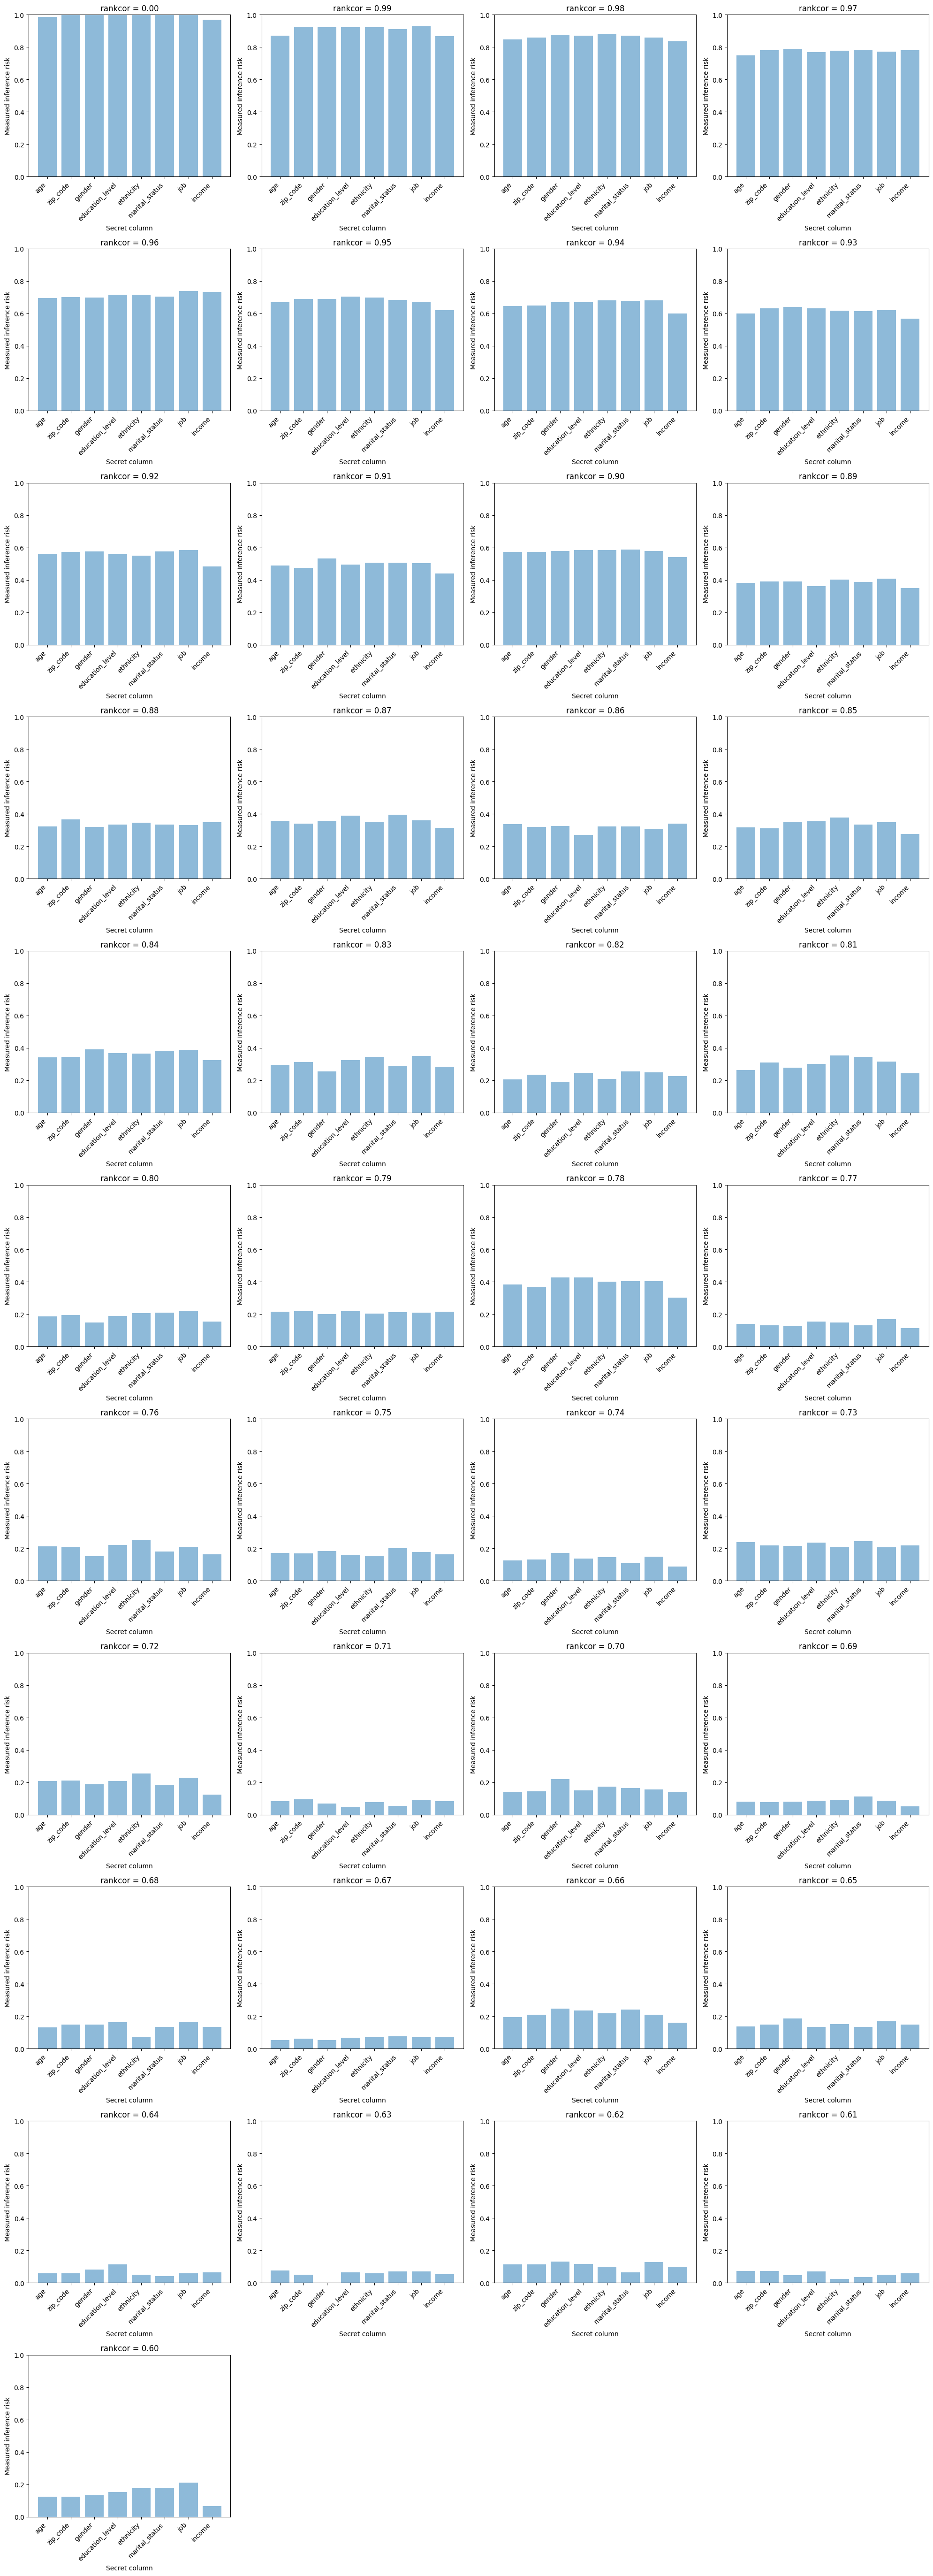

In [21]:
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]
num_plots = len(suffixes)

cols = 4
rows = math.ceil(num_plots / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  

for idx, suffix in enumerate(suffixes):
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        risks = [res[1].risk().value for res in results]
        secrets = [res[0] for res in results]

        ax = axes[idx]
        ax.bar(x=secrets, height=risks, alpha=0.5, ecolor='black', capsize=10)
        ax.set_xticklabels(secrets, rotation=45, ha='right')
        ax.set_ylabel("Measured inference risk")
        ax.set_xlabel("Secret column")
        ax.set_ylim(0, 1)
        ax.set_title(f"rankcor = 0.{suffix[-2:]}")
    else:
        axes[idx].axis("off") 
        
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


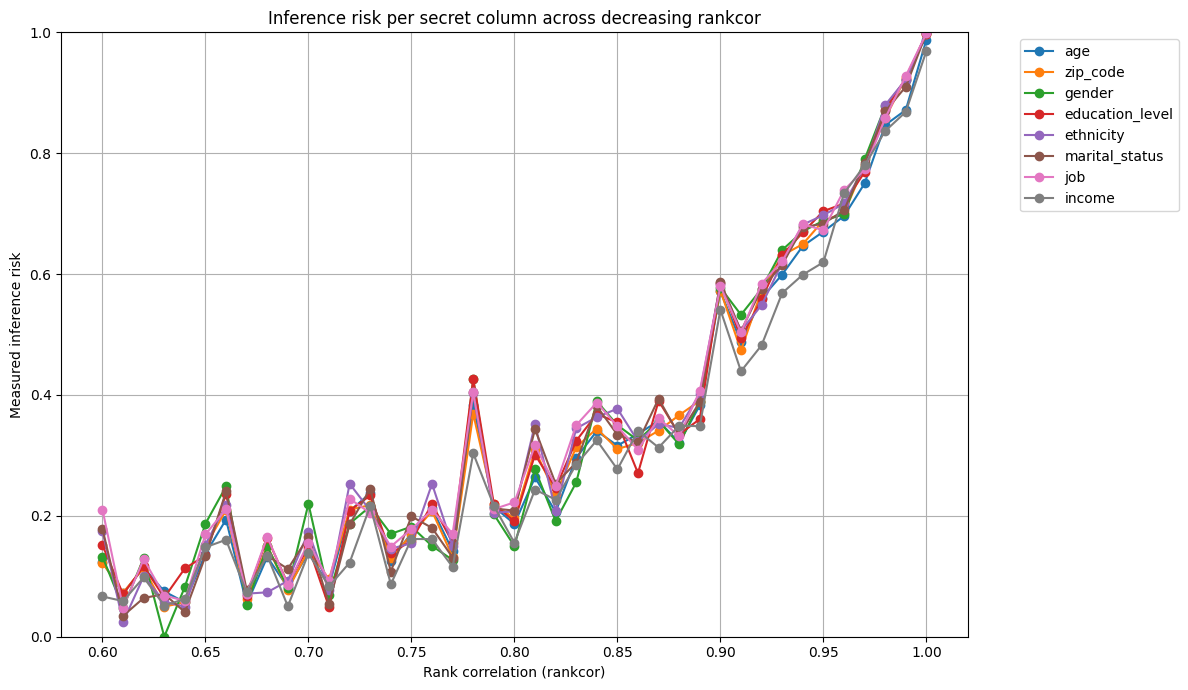

In [22]:
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]

secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)  

plt.figure(figsize=(12, 7))

for secret, risks in risk_by_secret.items():
    plt.plot(rankcors, risks, marker='o', label=secret)

plt.xlabel("Rank correlation (rankcor)")
plt.ylabel("Measured inference risk")
plt.title("Inference risk per secret column across decreasing rankcor")
plt.xticks(rankcors[::5])
plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


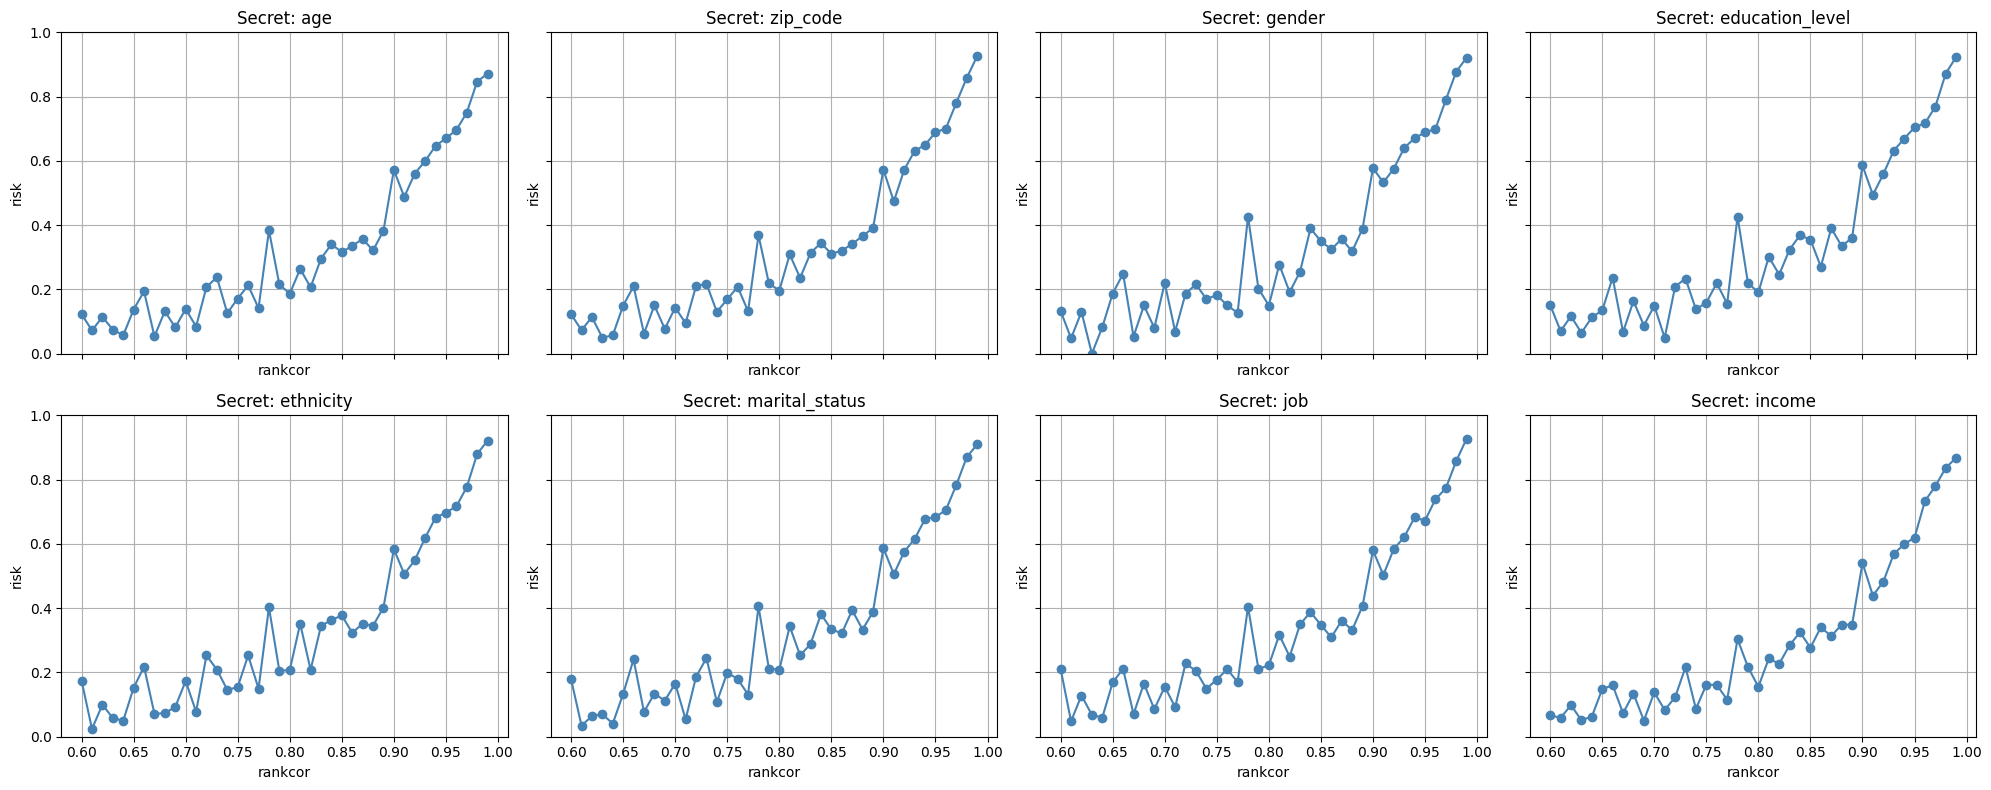

In [23]:
suffixes = [f"{i:03d}" for i in range(99, 59, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]
secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue')
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("rankcor")
    ax.set_ylabel("risk")
    ax.grid(True)

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


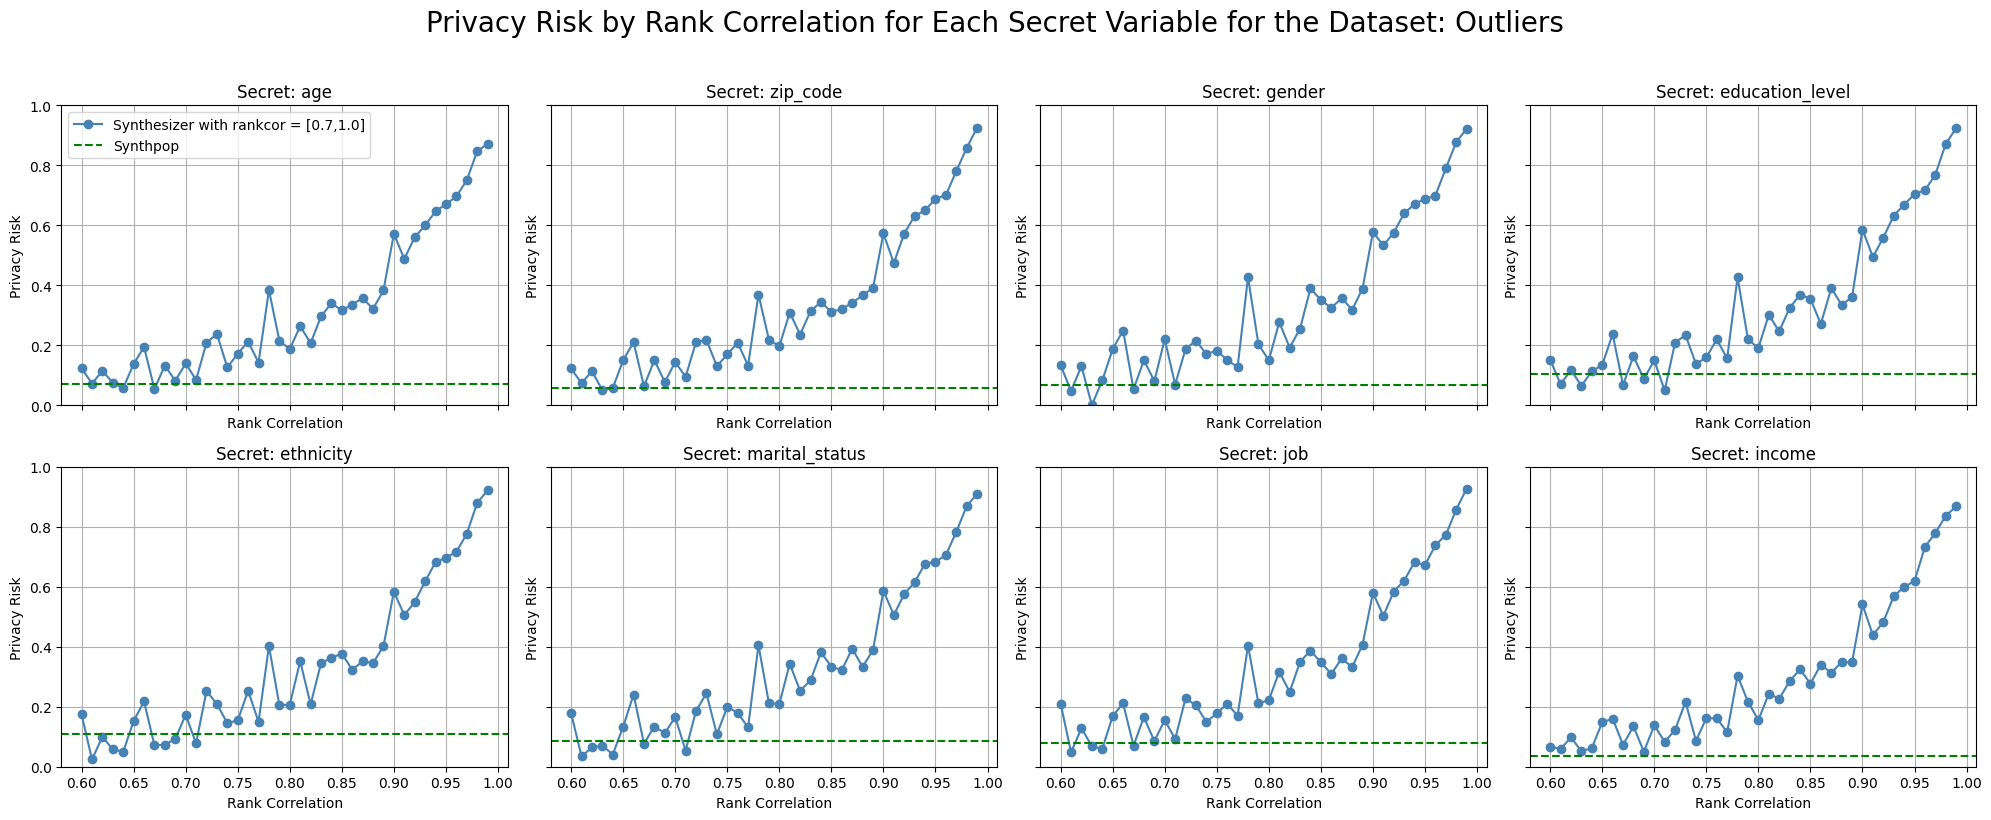

In [46]:
rankcors = [int(suffix) / 100 for suffix in suffixes]

risk1_dict = {secret: result.risk().value for secret, result in results3}

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue', label='Synthesizer with rankcor = [0.7,1.0]')

    if secret in risk1_dict:
        ax.axhline(y=risk1_dict[secret], color='green', linestyle='--', label='Synthpop')
    
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("Rank Correlation")
    ax.set_ylabel("Privacy Risk")
    ax.grid(True)

    if idx == 0:
        ax.legend()

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Privacy Risk by Rank Correlation for Each Secret Variable for the Dataset: Outliers", fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

